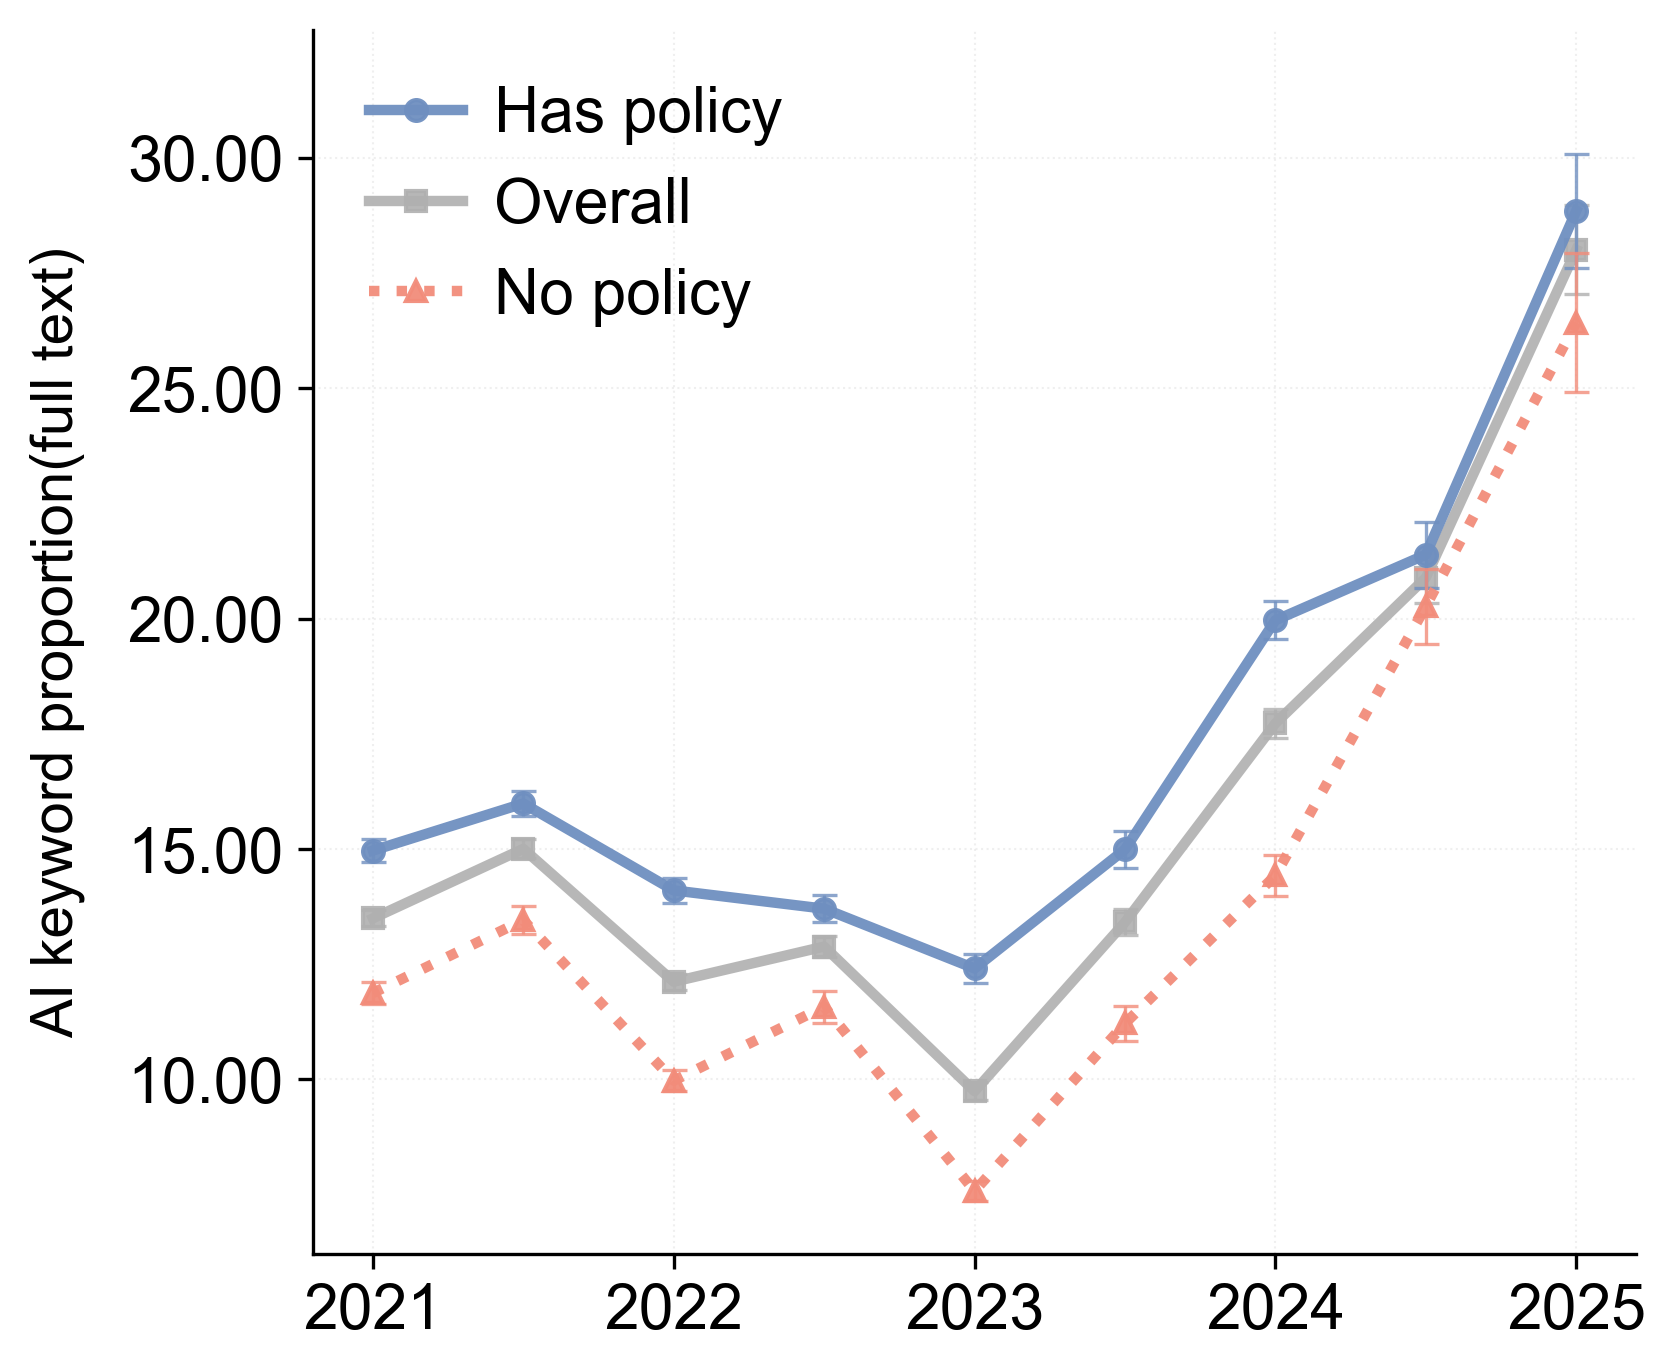

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

overall_path = r"ai_policy/results/full_text/by_half_year.csv"
policy_path  = r"ai_policy/results/full_text/by_half_year_policy.csv"

overall = pd.read_csv(overall_path)  
policy  = pd.read_csv(policy_path)

h_order = {'H1': 1, 'H2': 2}

overall_sorted = overall.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in overall_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_overall(y, h):
    row = overall[(overall["year"] == y) & (overall["half_year"] == h)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

def pick_policy(y, h, has_policy):
    row = policy[(policy["year"] == y) & (policy["half_year"] == h) & (policy["has_ai_policy"] == has_policy)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

overall_mean, overall_lo, overall_hi = zip(*[pick_overall(y, h) for y, h in periods])
true_mean, true_lo, true_hi         = zip(*[pick_policy(y, h, True)  for y, h in periods])
false_mean, false_lo, false_hi      = zip(*[pick_policy(y, h, False) for y, h in periods])

overall_mean = np.array(overall_mean, dtype=float)
true_mean    = np.array(true_mean, dtype=float)
false_mean   = np.array(false_mean, dtype=float)
def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

colors = {'with': '#6f8fc0', 'without': '#f28c7a', 'overall': '#b0b0b0'}

fig, ax = plt.subplots(figsize=(6, 5))

# Overall
ax.plot(x, overall_mean, marker='s', markersize=5, linestyle='-', color=colors['overall'],
        label='Overall', alpha=0.9, zorder=3)
ax.errorbar(x, overall_mean,
            yerr=[overall_mean - np.array(overall_lo), np.array(overall_hi) - overall_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['overall'],
            elinewidth=0.8, alpha=0.8, zorder=2)

# With policy
ax.plot(x, true_mean, marker='o', markersize=5, linestyle='-', color=colors['with'],
        label='Has policy', zorder=4, alpha=0.95)
ax.errorbar(x, true_mean,
            yerr=[true_mean - np.array(true_lo), np.array(true_hi) - true_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['with'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# Without policy
ax.plot(x, false_mean, marker='^', markersize=5, linestyle=':', color=colors['without'],
        label='No policy', zorder=4, alpha=0.95)
ax.errorbar(x, false_mean,
            yerr=[false_mean - np.array(false_lo), np.array(false_hi) - false_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['without'],
            elinewidth=0.8, alpha=0.8, zorder=3)

year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

ax.set_ylabel('AI keyword proportion(full text)', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]  # With policy, Overall, Without policy
ax.legend([handles[i] for i in order], [labels[i] for i in order],
          frameon=False, loc='best', ncol=1, handletextpad=0.5, columnspacing=1.0, handlelength=1.5)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('overrall——fulltext')
plt.show()


In [ ]:
import pandas as pd 

df = pd.read_csv(r'ai_policy/results/full_text/disclosure_df.csv')

In [68]:
df.journal_name.value_counts()

journal_name
PLoS ONE                                                       6
Scientific Reports                                             4
Frontiers in Medicine                                          4
Frontiers in Immunology                                        3
Frontiers in Plant Science                                     3
Public health reviews                                          2
Nature Communications                                          2
BMC Medical Education                                          2
Frontiers in Cell and Developmental Biology                    1
Frontiers in Marine Science                                    1
Genome biology                                                 1
Virtual Reality                                                1
Green Chemistry                                                1
Journal of Rehabilitation Medicine                             1
Journal of Cheminformatics                                     1
Frontiers in

In [18]:
df.columns

Index(['Unnamed: 0', 'paper_id', 'date', 'has_ai_policy', 'location',
       'ai_tool', 'journal_name', 'usage_purpose', 'journal_location',
       'journal_category', 'journal_usage', 'journal_usage_categories',
       'usage_purpose_categories_filtered'],
      dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'paper_id', 'date', 'has_ai_policy', 'location',
       'ai_tool', 'journal_name', 'usage_purpose', 'journal_location',
       'journal_category', 'journal_usage', 'journal_usage_categories',
       'usage_purpose_categories_filtered'],
      dtype='object')

In [ ]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['year_quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)

quarterly_counts = df.groupby('year_quarter')['paper_id'].count().reset_index()
quarterly_counts.columns = ['year_quarter', 'paper_count']

print(quarterly_counts)

按季度统计paper_id数量:
  year_quarter  paper_count
0      2023-Q1            1
1      2023-Q2            1
2      2023-Q3            5
3      2023-Q4            4
4      2024-Q1           11
5      2024-Q2           17
6      2024-Q3            5
7      2024-Q4           13
8      2025-Q1           19


In [27]:
df.groupby('usage_purpose_categories_filtered').paper_id.count()

usage_purpose_categories_filtered
Content Creation & Generation    13
Error Analysis & Others          14
Language & Grammar Support       15
Reference & Citation Support      1
Style & Formatting                4
Translation Services              1
Writing & Editing Support        28
Name: paper_id, dtype: int64

In [29]:
df.groupby('journal_category').paper_id.count()

journal_category
Disclosure Required    52
Not Mentioned          22
Name: paper_id, dtype: int64

In [30]:
df.groupby('location').paper_id.count()

location
AI Declaration Section       9
Acknowledgements            42
Contributor Section          2
Declaration of Interests     3
Disclosure Section          12
Experimental Section         3
Methods                      5
Name: paper_id, dtype: int64

In [ ]:
numbers = [28, 19, 62, 65, 83978, 68346, 77175, 71059, 99977, 91783, 108226, 72490, 77337, 74993, 101989, 97163, 119753, 96377, 101448, 122115, 87661, 106315, 72979, 85023, 75206, 77180, 72444, 112919, 67294, 75590, 83955, 81366, 84635, 77430, 92849, 81333, 123157, 76128, 97589, 94145, 87145, 112599, 97882, 106608, 111635, 101818, 108673, 95614, 82083, 107523, 120964, 94328, 77878, 119747, 112874, 179657, 179352, 149051]

total = sum(numbers)

总和: 5,235,012


In [ ]:
df.columns

Index(['Unnamed: 0', 'paper_id', 'date', 'has_ai_policy', 'location',
       'ai_tool', 'journal_name', 'usage_purpose', 'journal_location',
       'journal_category', 'journal_usage', 'journal_usage_categories',
       'usage_purpose_categories_filtered'],
      dtype='object')

In [31]:
df.groupby('ai_tool').paper_id.count()

ai_tool
Chat GPT 3.5             1
Chat GPT version 3.5     1
ChatGPT                 36
ChatGPT 3.5              2
ChatGPT 4                1
ChatGPT and Claude       1
ChatGPT v4 (DALL-E)      1
ChatGPT-3                1
ChatGPT-3.5              3
ChatGPT-4                4
Claude                   2
Claude 2.1               1
DeepL Translator         1
DeepL Write              1
GPT-4                    8
GPT-4 Turbo              1
Grammarly                3
Grammarly, ChatGPT       1
Microsoft Copilot        1
Paperpal.com             1
Unspecified              5
Name: paper_id, dtype: int64

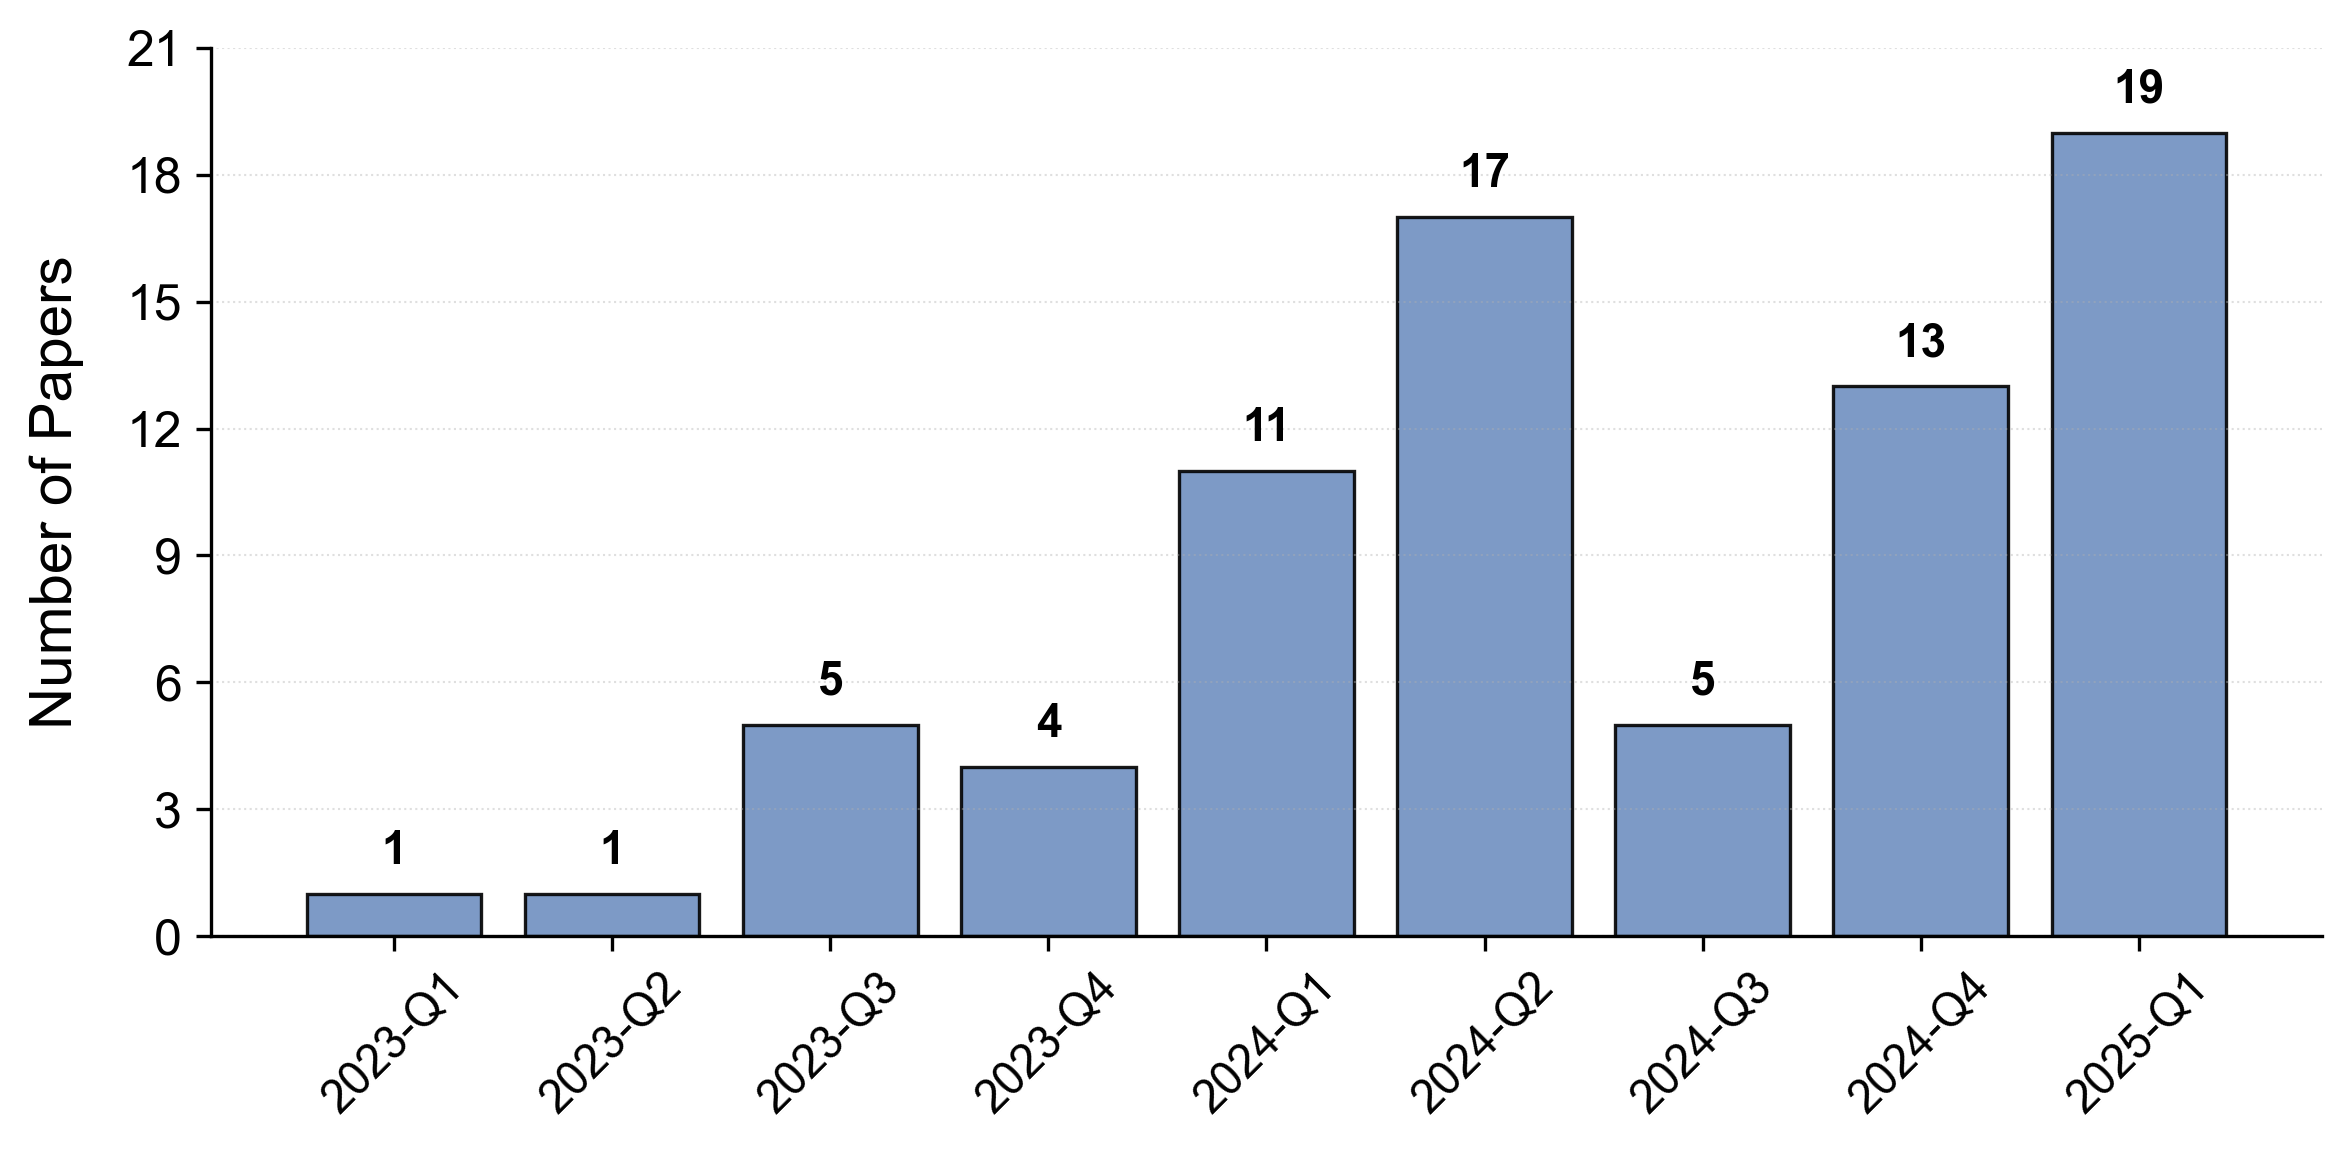

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator  

quarterly_data = {
    'year_quarter': ['2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4', '2024-Q1', '2024-Q2', '2024-Q3', '2024-Q4', '2025-Q1'],
    'paper_count': [1, 1, 5, 4, 11, 17, 5, 13, 19]
}
df_quarterly = pd.DataFrame(quarterly_data)


quarters = df_quarterly['year_quarter'].values
counts = df_quarterly['paper_count'].values

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.0,
})

FIGURE_CONFIG = {
    'figsize': (8, 4),
    'bar_color': '#6f8fc0',
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 11,
    'xlabel_fontsize': 14,
    'ylabel_fontsize': 14,
    'labelpad': 10,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
}

fig, ax = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

x_pos = np.arange(len(quarters))
bars = ax.bar(x_pos, counts, 
              color=FIGURE_CONFIG['bar_color'], 
              edgecolor=FIGURE_CONFIG['edgecolor'], 
              linewidth=FIGURE_CONFIG['linewidth'], 
              alpha=FIGURE_CONFIG['alpha'])


for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax.set_xticks(x_pos)
ax.set_xticklabels(quarters, rotation=45, fontsize=FIGURE_CONFIG['label_fontsize'])

y_limit = int(max(counts) * 1.15)
ax.set_ylim(0, y_limit)


ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('', 
               labelpad=FIGURE_CONFIG['labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])
ax.set_ylabel('Number of Papers', 
               labelpad=FIGURE_CONFIG['labelpad'], 
               fontsize=FIGURE_CONFIG['ylabel_fontsize'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='y')

plt.tight_layout()

save_transparent_figure('quarterly_paper_count')
plt.show()

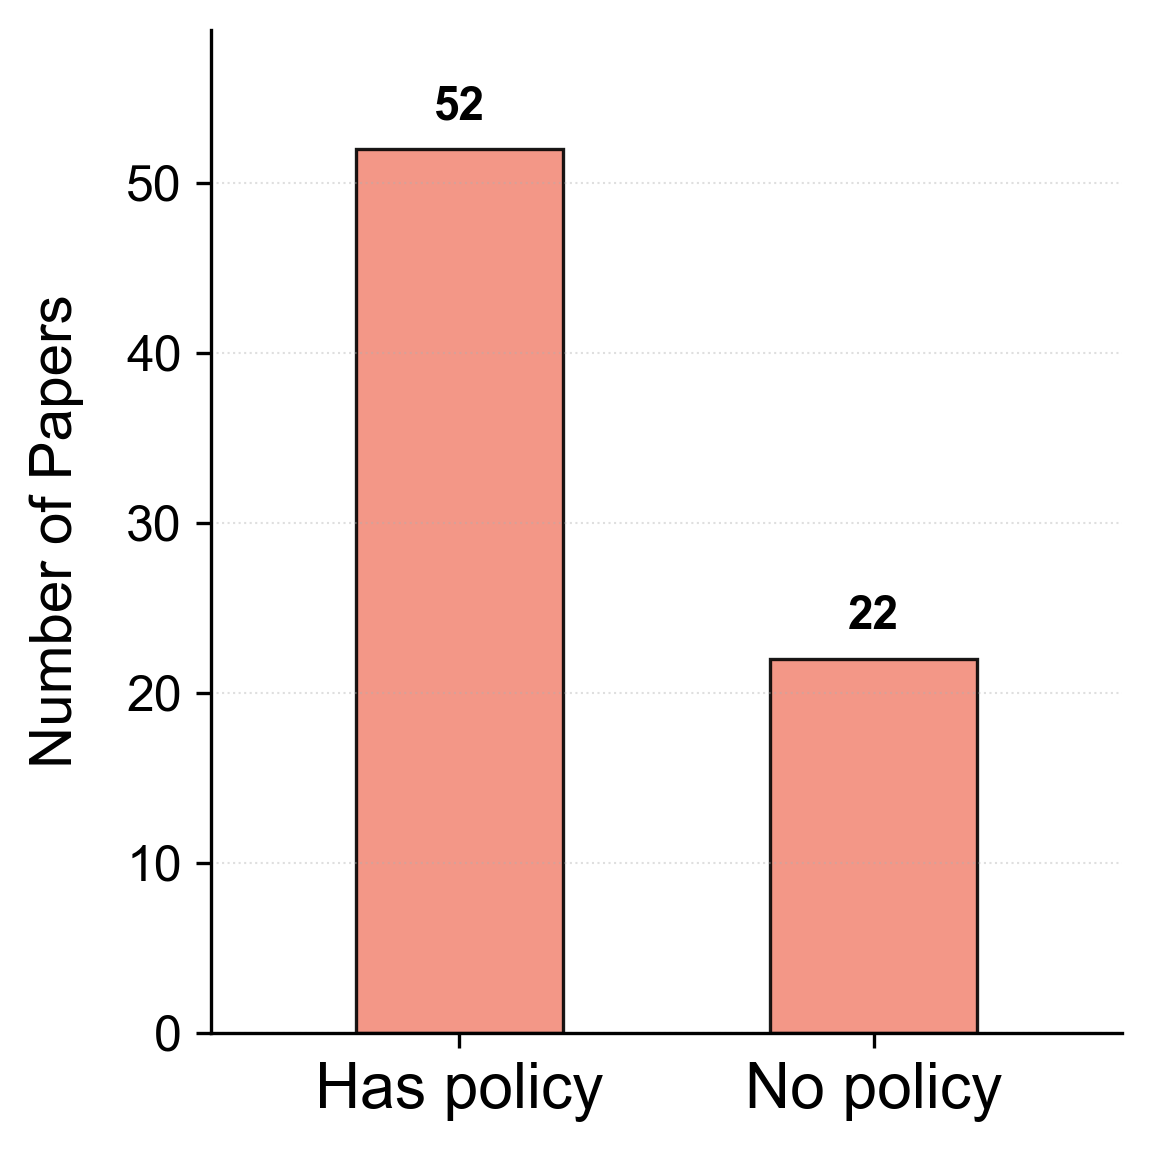

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

category_data = {
    'Has policy': 52,
    'No policy': 22
}

sorted_category = dict(sorted(category_data.items(), key=lambda x: x[1], reverse=True))
categories = list(sorted_category.keys())
counts = list(sorted_category.values())

FIGURE_CONFIG = {
    'figsize': (4, 4),  
    'bar_color': '#f28c7a',
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 15,
    'xlabel_fontsize': 14,
    'ylabel_fontsize': 14,
    'labelpad': 10,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
}

fig, ax = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

x_pos = np.arange(len(categories))
bars = ax.bar(x_pos, counts, 
              width=0.5,  
              color=FIGURE_CONFIG['bar_color'], 
              edgecolor=FIGURE_CONFIG['edgecolor'], 
              linewidth=FIGURE_CONFIG['linewidth'], 
              alpha=FIGURE_CONFIG['alpha'])

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=FIGURE_CONFIG['label_fontsize'])

ax.set_xlim(-0.6, len(categories) - 0.4)

y_limit = int(max(counts) * 1.15)
ax.set_ylim(0, y_limit)
ax.set_xlabel('', 
               labelpad=FIGURE_CONFIG['labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])
ax.set_ylabel('Number of Papers', 
               labelpad=FIGURE_CONFIG['labelpad'], 
               fontsize=FIGURE_CONFIG['ylabel_fontsize'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='y')

plt.tight_layout()
plt.savefig('journal_category.png', dpi=600, bbox_inches='tight', transparent=True)
plt.savefig('journal_category.tiff', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

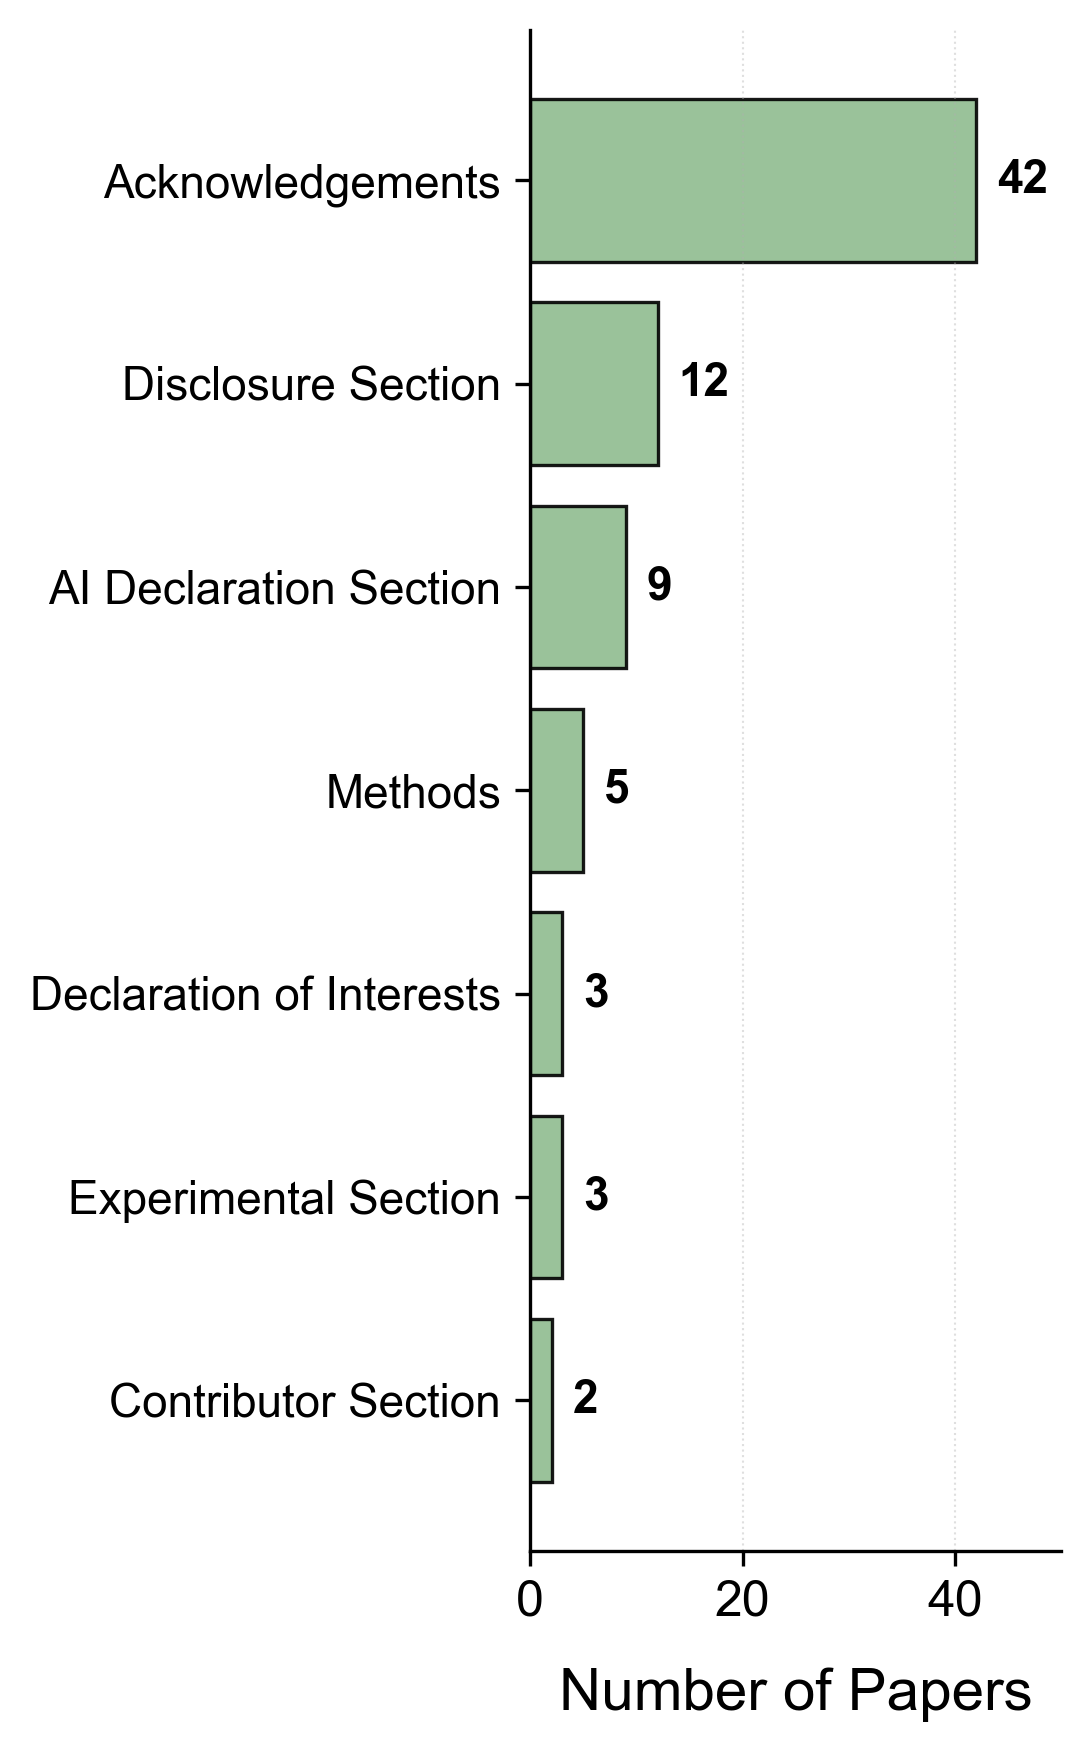

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

location_data = {
    'AI Declaration Section': 9,
    'Acknowledgements': 42,
    'Contributor Section': 2,
    'Declaration of Interests': 3,
    'Disclosure Section': 12,
    'Experimental Section': 3,
    'Methods': 5
}

sorted_location = dict(sorted(location_data.items(), key=lambda x: x[1], reverse=True))

locations = list(sorted_location.keys())
counts = list(sorted_location.values())

# 配置
FIGURE_CONFIG = {
    'figsize': (3, 6),
    'bar_color': '#8fbc8f',
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 11,
    'xlabel_fontsize': 14,
    'xlabel_labelpad': 10,
    'left_margin': 0.35,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
}

fig, ax = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

y_pos = np.arange(len(locations))
bars = ax.barh(y_pos, counts, 
               color=FIGURE_CONFIG['bar_color'], 
               edgecolor=FIGURE_CONFIG['edgecolor'], 
               linewidth=FIGURE_CONFIG['linewidth'], 
               alpha=FIGURE_CONFIG['alpha'])


for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax.set_yticks(y_pos)
ax.set_yticklabels(locations, fontsize=FIGURE_CONFIG['label_fontsize'])
ax.invert_yaxis()

x_limit = int(max(counts) * 1.2)
ax.set_xlim(0, x_limit)
ax.set_xlabel('Number of Papers', 
               labelpad=FIGURE_CONFIG['xlabel_labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='x')

plt.tight_layout()
plt.subplots_adjust(left=FIGURE_CONFIG['left_margin'])

plt.savefig('location_distribution.png', dpi=600, bbox_inches='tight', transparent=True)
plt.savefig('location_distribution.tiff', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

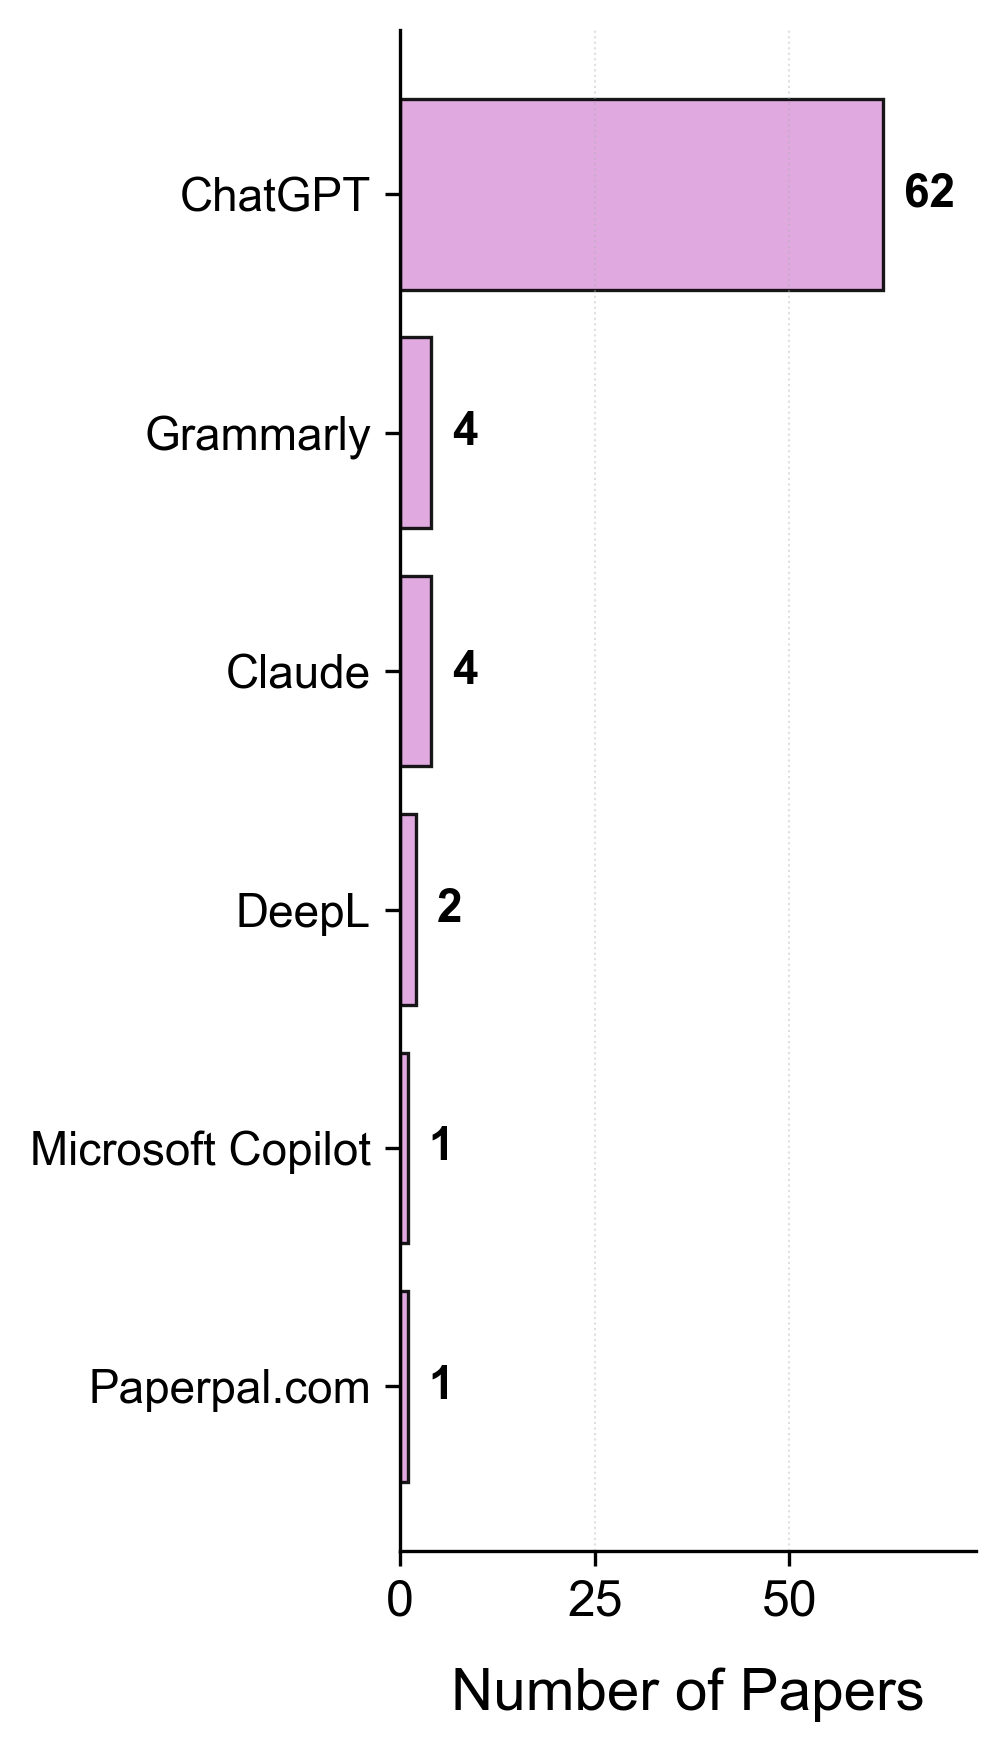

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ai_tools_merged = {
    'ChatGPT': 62,  
    'Grammarly': 4,     
    'Claude': 4,        
    'DeepL': 2,         
    'Microsoft Copilot': 1,
    'Paperpal.com': 1
}

sorted_tools = dict(sorted(ai_tools_merged.items(), key=lambda x: x[1], reverse=True))

tools = list(sorted_tools.keys())
counts = list(sorted_tools.values())

FIGURE_CONFIG = {
    'figsize': (3, 6),
    'bar_color': '#dda0dd',
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 11,
    'xlabel_fontsize': 14,
    'xlabel_labelpad': 10,
    'left_margin': 0.3,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
}

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.0,
})

fig, ax = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

y_pos = np.arange(len(tools))
bars = ax.barh(y_pos, counts, 
               color=FIGURE_CONFIG['bar_color'], 
               edgecolor=FIGURE_CONFIG['edgecolor'], 
               linewidth=FIGURE_CONFIG['linewidth'], 
               alpha=FIGURE_CONFIG['alpha'])

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax.set_yticks(y_pos)
ax.set_yticklabels(tools, fontsize=FIGURE_CONFIG['label_fontsize'])
ax.invert_yaxis()

x_limit = int(max(counts) * 1.2)
ax.set_xlim(0, x_limit)
ax.set_xlabel('Number of Papers', 
               labelpad=FIGURE_CONFIG['xlabel_labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='x')

plt.tight_layout()
plt.subplots_adjust(left=FIGURE_CONFIG['left_margin'])

plt.savefig('ai_tool_distribution.png', dpi=600, bbox_inches='tight', transparent=True)
plt.savefig('ai_tool_distribution.tiff', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


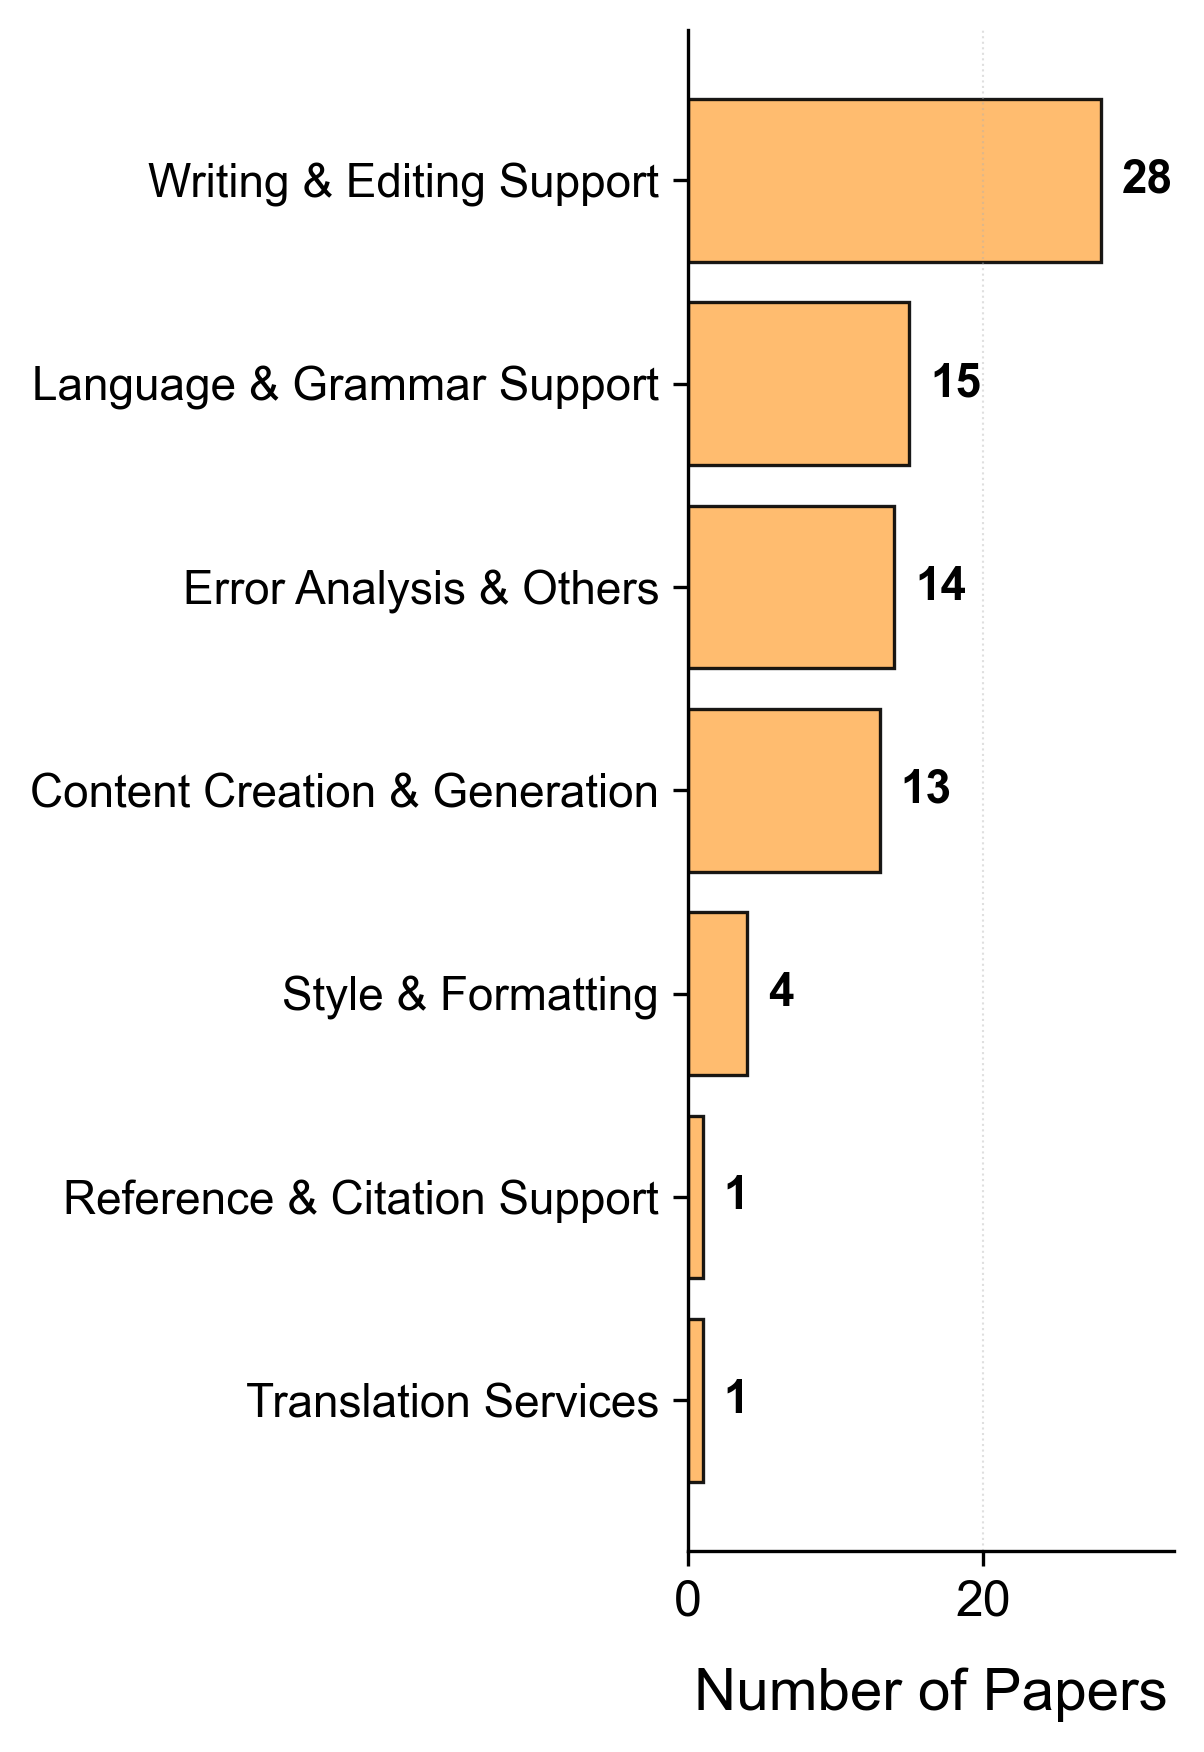

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

usage_data = {
    'Content Creation & Generation': 13,
    'Error Analysis & Others': 14,
    'Language & Grammar Support': 15,
    'Reference & Citation Support': 1,
    'Style & Formatting': 4,
    'Translation Services': 1,
    'Writing & Editing Support': 28
}

sorted_usage = dict(sorted(usage_data.items(), key=lambda x: x[1], reverse=True))

categories = list(sorted_usage.keys())
counts = list(sorted_usage.values())

FIGURE_CONFIG = {
    'figsize': (3, 6),
    'bar_color': '#ffb55f',
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 11,
    'xlabel_fontsize': 14,
    'xlabel_labelpad': 10,
    'left_margin': 0.4,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
}

fig, ax = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

y_pos = np.arange(len(categories))
bars = ax.barh(y_pos, counts, 
               color=FIGURE_CONFIG['bar_color'], 
               edgecolor=FIGURE_CONFIG['edgecolor'], 
               linewidth=FIGURE_CONFIG['linewidth'], 
               alpha=FIGURE_CONFIG['alpha'])

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax.set_yticks(y_pos)
ax.set_yticklabels(categories, fontsize=FIGURE_CONFIG['label_fontsize'])
ax.invert_yaxis()

x_limit = int(max(counts) * 1.2)
ax.set_xlim(0, x_limit)
ax.set_xlabel('Number of Papers', 
               labelpad=FIGURE_CONFIG['xlabel_labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='x')

plt.tight_layout()
plt.subplots_adjust(left=FIGURE_CONFIG['left_margin'])

plt.savefig('usage_purpose_categories.png', dpi=600, bbox_inches='tight', transparent=True)
plt.savefig('usage_purpose_categories.tiff', dpi=600, bbox_inches='tight', transparent=True)
plt.show()